# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 
 There seems to be a strong positive correlation between weight and tumor volume.
 
 Capomulin and Ramicane had small final tumor sizes on average in comparison to Infubinol and Ceftamin.
 
 Based on Capomulin mouse l509, Capomulin helped reduced the tumor size over time.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
#mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#mouse_study = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")
mouse_study = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID")


# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [47]:
# Checking the number of mice.
mice_num = mouse_study["Mouse ID"].nunique()
mice_num

249

In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
#dup_mice_df = mouse_study.loc[mouse_study["Mouse ID"] == "g989", :]
#dup_mice_df

In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_study[mouse_study['Mouse ID'].isin(dup_mice)==False]
clean_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [51]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study = clean_mouse["Mouse ID"].nunique()
clean_mouse_study

248

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse["Tumor Volume (mm3)"].groupby(clean_mouse["Drug Regimen"]).mean()
median = clean_mouse["Tumor Volume (mm3)"].groupby(clean_mouse["Drug Regimen"]).median()
variance = clean_mouse["Tumor Volume (mm3)"].groupby(clean_mouse["Drug Regimen"]).var()
stdev = clean_mouse["Tumor Volume (mm3)"].groupby(clean_mouse["Drug Regimen"]).std()
sem = clean_mouse["Tumor Volume (mm3)"].groupby(clean_mouse["Drug Regimen"]).sem()
#mean = clean_mouse_study["Tumor Volume (mm3)"].mean()
#regimen_group = clean_mouse_study.groupby("Drug Regimen")
#mean_tumor = regimen_group["Tumor Volume (mm3)"].mean()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":stdev, 
                           "Tumor Volume Std. Err.":sem})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
#summary_stat =  clean_mouse.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'variance', 'stdev', 'sem'])
#sumary_stat
summary_agg =  clean_mouse.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

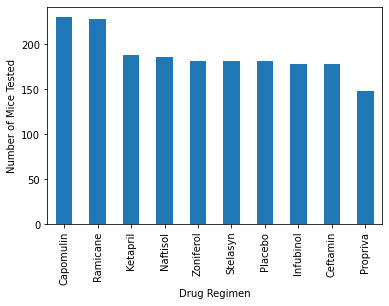

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = clean_mouse["Drug Regimen"].value_counts().plot.bar()  
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Number of Mice Tested")

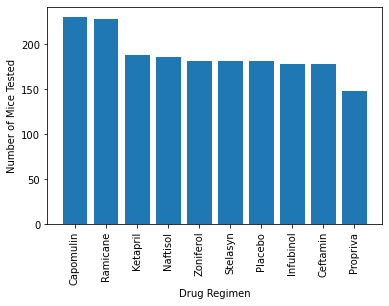

In [55]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(clean_mouse))
tick_locations = [value for value in x_axis]

x_axis = clean_mouse["Drug Regimen"].value_counts().index.values
y_axis = clean_mouse["Drug Regimen"].value_counts().values

plt.xticks(tick_locations, rotation="vertical")
plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

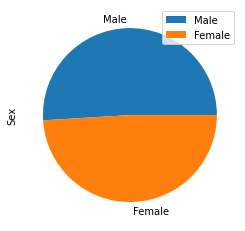

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df = pd.DataFrame({'Sex':clean_mouse["Sex"].value_counts()})
plot = df.plot.pie(y='Sex')

Text(0, 0.5, 'Sex')

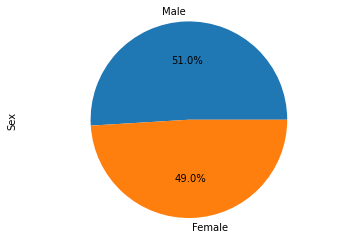

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_percent = clean_mouse["Sex"].value_counts()
labels = ["Male","Female"]
plt.pie(gender_percent, labels = labels, autopct="%1.1f%%")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = pd.DataFrame(clean_mouse.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_mouse, timepoint_df, on=('Mouse ID','Timepoint'), how = 'right')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = pd.DataFrame(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Create empty list to fill with tumor vol data (for plotting)
Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartiles = clean_mouse.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# lower_bound = lower_q - (1.5*iqr)
# upper_bound = upper_q + (1.5*iqr)
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merged_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        Capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Ramicane':
        Ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Infubinol':
        Infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Ceftamin':
        Ceftamin.append(row['Tumor Volume (mm3)'])

    # add subset 
final_drug_df = pd.DataFrame({"Capomulin": Capomulin,
                       'Ramicane': Ramicane,
                       'Infubinol': Infubinol,
                       'Ceftamin': Ceftamin
                       })   

    # Determine outliers using upper and lower bounds
# for treatment in treatments:
#     quartiles = final_drug_df.quantile([.25, .5, .75])
#     lowerq = quartiles[.25]
#     upperq = quartiles[.75]
#     iqr = upperq - lowerq
#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5*iqr)

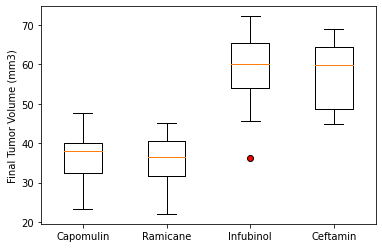

In [74]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier = dict(marker='o', markerfacecolor='r', markeredgecolor='black')

# Plot boxplot
plt.boxplot(final_drug_df, flierprops = outlier)

# Add title and labels to boxplot
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

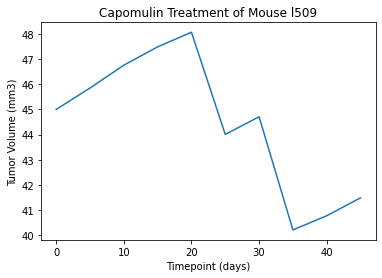

In [75]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_mouse.loc[clean_mouse['Mouse ID'] == 'l509']
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'])

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

plt.show()

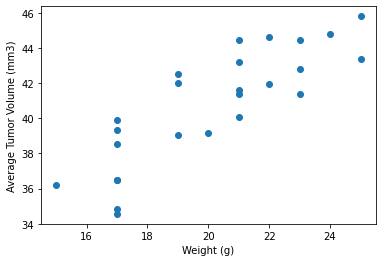

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]

avg = Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


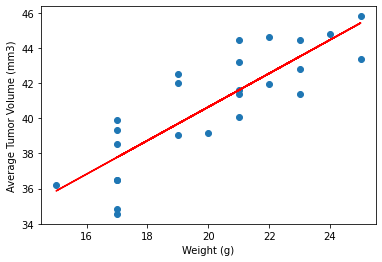

In [77]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
avg = Capomulin_df.groupby(['Mouse ID']).mean()
fit = avg['Weight (g)'] * slope  + intercept

plt.plot(avg['Weight (g)'], fit, color = "red")
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {round(r_value,2)}")
plt.show()